Churn

###

###

### 

In [191]:
fraud_churn = combined_df.groupby('customer_id')['date'].max()
fraud_churn

In [130]:
pd.set_option('display.float_format', '{:.2f}'.format)
combined_df['bank_transfer_in'].describe()

count   3924616.00
mean       1183.18
std        2764.47
min           0.00
25%           2.00
50%          98.00
75%         536.00
max       34209.00
Name: bank_transfer_in, dtype: float64

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from datetime import timedelta

In [132]:
import pandas as pd

dataframes = []

for year in range(2008, 2024):
    file_path = f"../data/train_{year}.parquet"
    try:
        df = pd.read_parquet(file_path)
        dataframes.append(df)
    except Exception as e:
        print(f"Failed to read file {file_path}: {e}")
if dataframes:
    combined_df = pd.concat(dataframes, ignore_index=True)
    print(f"Total rows in the combined DataFrame: {len(combined_df)}")
else:
    print("No files were successfully read.")

Total rows in the combined DataFrame: 3926058


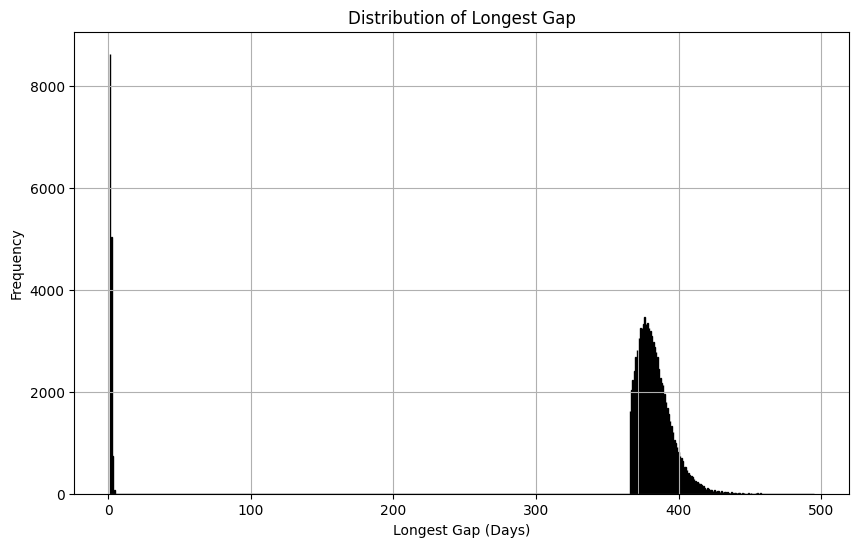

In [165]:
gap_diff_df = combined_df.sort_values(by=['customer_id', 'date'])
gap_diff_df['time_diff'] = gap_diff_df.groupby('customer_id')['date'].diff()
longest_gap = gap_diff_df.groupby('customer_id')['time_diff'].max()

longest_gap_days = longest_gap.dt.total_seconds() / (60 * 60 * 24)  

plt.figure(figsize=(10, 6))
plt.hist(longest_gap_days.dropna(), bins=1000, edgecolor='black', color='skyblue')  
plt.title('Distribution of Longest Gap')
plt.xlabel('Longest Gap (Days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [164]:
last_interaction = combined_df.groupby('customer_id')['date'].max()

churn_date = pd.Timestamp('2023-12-31')
cutoff_date = churn_date - pd.DateOffset(months=18)

churn_status = last_interaction <= cutoff_date

df_train = churn_status.reset_index(name='churn_status')

len(df_train[df_train['churn_status'] == True]) / len(df_train) * 100

19.95742516436524

## Data Cleaning

### ATM Transfer Out

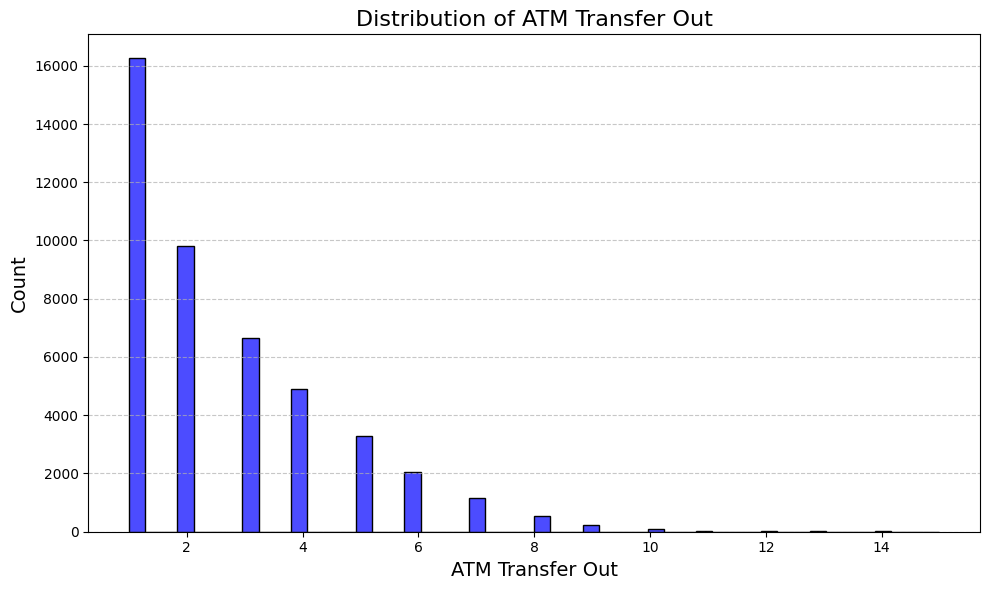

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_data = combined_df[(combined_df['atm_transfer_out'] > 0) & (combined_df['atm_transfer_out'] <= 20)]
# filtered_data = combined_df[combined_df['atm_transfer_out'] > 0]


plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['atm_transfer_out'], bins=50, color='blue', edgecolor='black', alpha=0.7)

plt.title('Distribution of ATM Transfer Out', fontsize=16)
plt.xlabel('ATM Transfer Out', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [135]:
len(filtered_data[filtered_data['atm_transfer_out'] > 10]) / len(filtered_data) * 100

0.19288754877616177

In [136]:
combined_df = combined_df[combined_df["atm_transfer_out"] <= 10]
len(combined_df)

3924616

### ATM Transfer In

In [137]:
# len(combined_df[combined_df['atm_transfer_in'] >= 1]) / len(combined_df) * 100
max(combined_df['atm_transfer_in'])

2325

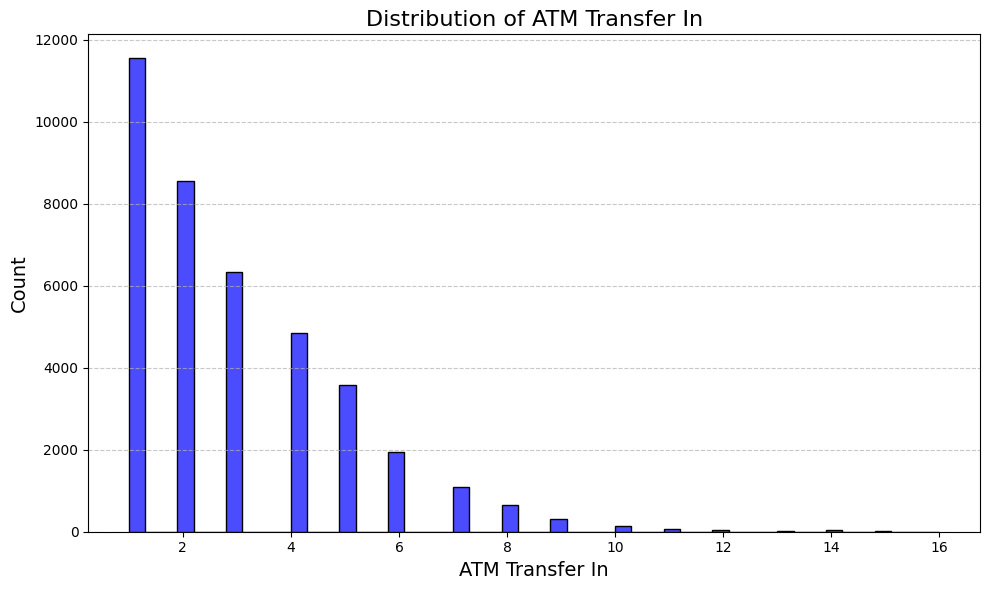

In [138]:
# GABBY 
# filtered_data = combined_df[(combined_df['atm_transfer_out'] > 0) & (combined_df['atm_transfer_out'] <= 20)]
filtered_data = combined_df[(combined_df['atm_transfer_in'] > 0) & (combined_df['atm_transfer_in'] <= 20)]


plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['atm_transfer_in'], bins=50, color='blue', edgecolor='black', alpha=0.7)

plt.title('Distribution of ATM Transfer In', fontsize=16)
plt.xlabel('ATM Transfer In', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

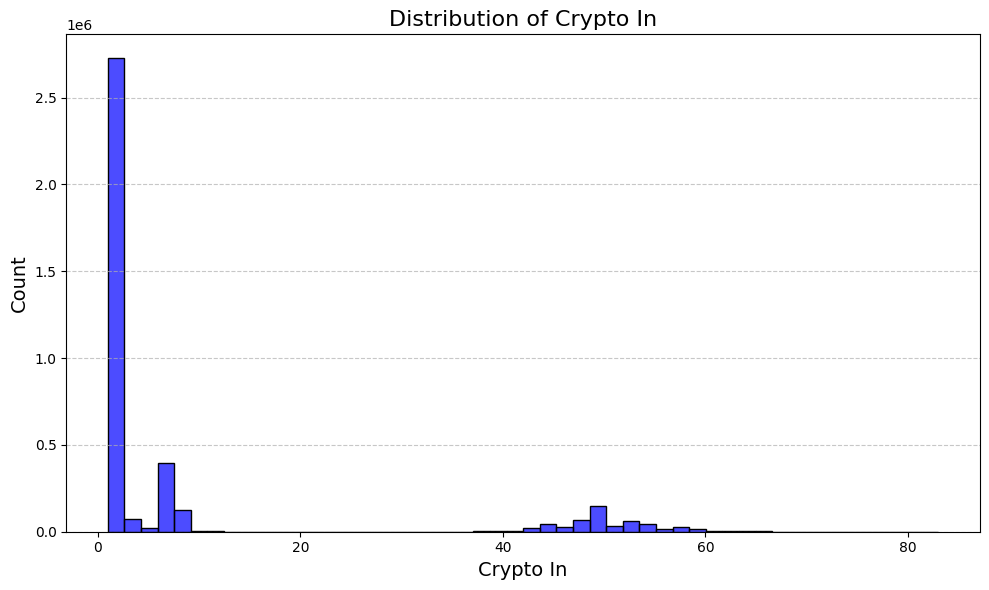

In [139]:
# GABBY 2
# filtered_data = combined_df[(combined_df['atm_transfer_out'] > 0) & (combined_df['atm_transfer_out'] <= 20)]
filtered_data = combined_df[(combined_df['crypto_in'] > 0) & (combined_df['crypto_in'] <= 100)]


plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['crypto_in'], bins=50, color='blue', edgecolor='black', alpha=0.7)

plt.title('Distribution of Crypto In', fontsize=16)
plt.xlabel('Crypto In', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [140]:
combined_df['crypto_in'].unique()

array([56, 46, 48, 49, 60, 52, 55, 53, 57, 45, 58, 54, 51, 50,  1,  5,  4,
        6,  2,  7,  8,  9,  3, 41, 42, 43, 38, 47, 59, 44, 62, 10, 61, 40,
       64, 63, 75, 39, 71, 23, 21, 25, 24, 22, 20, 27, 28, 26, 29, 19, 18,
       30, 12, 11, 13,  0, 34, 31, 33, 35, 65, 37, 14, 66, 15, 16, 36, 32,
       68, 67, 69, 17, 74, 73, 70, 72, 83, 77, 79, 76, 81, 78, 80])

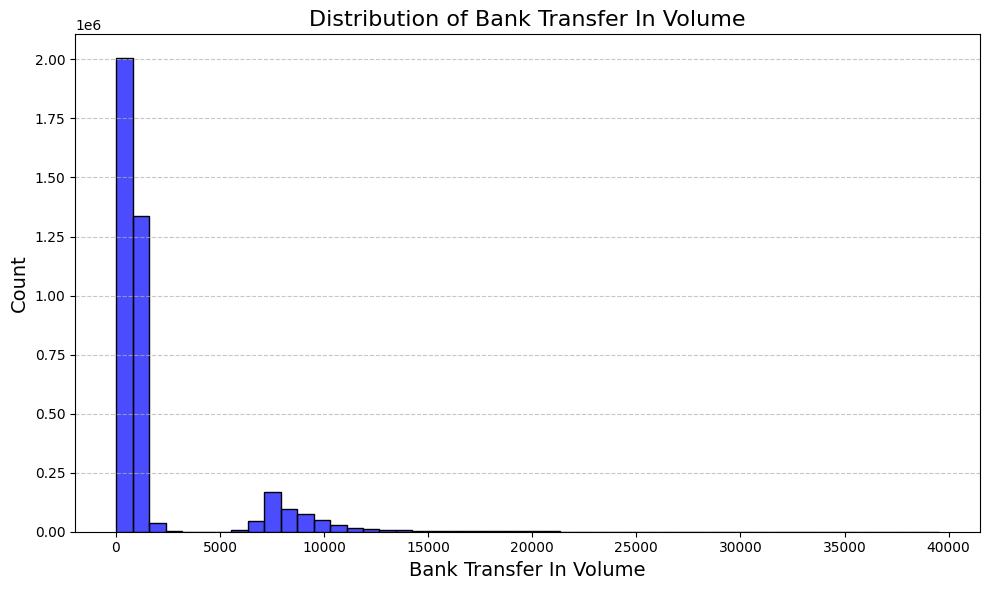

In [141]:
filtered_data = combined_df
# filtered_data = combined_df[(combined_df['bank_transfer_in_volume'] > 0) & (combined_df['crypto_in'] <= 100)]


plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['bank_transfer_in_volume'], bins=50, color='blue', edgecolor='black', alpha=0.7)

plt.title('Distribution of Bank Transfer In Volume', fontsize=16)
plt.xlabel('Bank Transfer In Volume', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

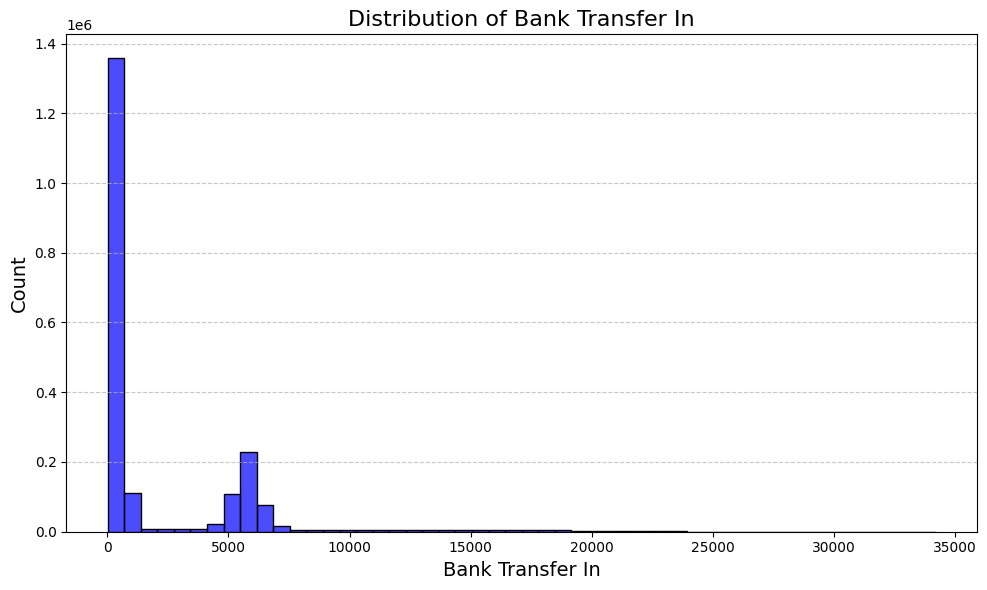

In [142]:
#len(combined_df[combined_df['bank_transfer_in'] > 80]) / len(combined_df) * 100

# filtered_data = combined_df[(combined_df['bank_transfer_in'] > 0) & (combined_df['bank_transfer_in'] <= 20)]
filtered_data = combined_df[combined_df['bank_transfer_in'] > 10]


plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['bank_transfer_in'], bins=50, color='blue', edgecolor='black', alpha=0.7)

plt.title('Distribution of Bank Transfer In', fontsize=16)
plt.xlabel('Bank Transfer In', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [143]:
max(combined_df['bank_transfer_in'])

34209

In [173]:
percentile_98 = np.percentile(combined_df['bank_transfer_in'], 98)

print("98th Percentile:", percentile_98)
print("Max Value:", max(combined_df['bank_transfer_in']))

raw_mean = combined_df['bank_transfer_in'].mean()
print("Raw Mean:", raw_mean)

Q1 = combined_df['bank_transfer_in'].quantile(0.25)
Q3 = combined_df['bank_transfer_in'].quantile(0.75)
IQR = Q3 - Q1

filtered_df = combined_df[
    (combined_df['bank_transfer_in'] >= (Q1 - 1.5 * IQR)) &
    (combined_df['bank_transfer_in'] <= (Q3 + 1.5 * IQR))
]


98th Percentile: 8224.0
Max Value: 34209
Raw Mean: 1183.1775985217407


In [176]:
filtered_data = combined_df[combined_df['bank_transfer_in'] <= 8224.0]

last_interaction = filtered_data.groupby('customer_id')['date'].max()

churn_date = pd.Timestamp('2023-12-31')
cutoff_date = churn_date - pd.DateOffset(months=18)

churn_status = last_interaction <= cutoff_date

df_train = churn_status.reset_index(name='churn_status')

len(df_train[df_train['churn_status'] == True]) / len(df_train) * 100

20.12499762542505

## Feature Engineering

- country
- customer age
- customer job category

In [192]:
last_interaction = combined_df.groupby('customer_id')['date'].max()

churn_date = pd.Timestamp('2023-12-31')
cutoff_date = churn_date - pd.DateOffset(months=18)

churn_status = last_interaction <= cutoff_date

df_trainhurn_status.reset_index(name='churn_status')

len(df_train[df_train['churn_status'] == True]) / len(df_train) * 100

19.95742516436524

In [197]:
import pandas as pd
import numpy as np  # Import numpy explicitly

# Merge dataframes on customer_id
merged_df = combined_df.merge(df_train, on="customer_id", how="inner")

# Categorizing based on model_predicted_fraud and churn_status
conditions = [
    (merged_df["model_predicted_fraud"] == True) & (merged_df["churn_status"] == True),
    (merged_df["model_predicted_fraud"] == False) & (merged_df["churn_status"] == False),
    (merged_df["model_predicted_fraud"] == True) & (merged_df["churn_status"] == False),
    (merged_df["model_predicted_fraud"] == False) & (merged_df["churn_status"] == True)
]

categories = ["Both True", "Both False", "Fraud True, Churn False", "Fraud False, Churn True"]

# Use numpy.select instead of pd.np.select
merged_df["Category"] = np.select(conditions, categories, default="Unknown")

# Count occurrences of each category
category_counts = merged_df["Category"].value_counts()

# Display results
print(category_counts)


Category
Both False                 2652770
Fraud False, Churn True    1270094
Both True                      896
Fraud True, Churn False        856
Name: count, dtype: int64


In [183]:
type(combined_df['date_of_birth'][0])

datetime.date

In [182]:
combined_df['date_of_birth']

0          1954-07-10
1          1954-07-10
2          1954-07-10
3          1954-07-10
4          1954-07-10
              ...    
3926053    1998-12-27
3926054    1977-04-15
3926055    1983-06-11
3926056    1941-08-27
3926057    1974-04-18
Name: date_of_birth, Length: 3924616, dtype: object

In [171]:
combined_df.columns

Index(['Id', 'customer_id', 'interest_rate', 'name', 'country',
       'date_of_birth', 'address', 'date', 'atm_transfer_in',
       'atm_transfer_out', 'bank_transfer_in', 'bank_transfer_out',
       'crypto_in', 'crypto_out', 'bank_transfer_in_volume',
       'bank_transfer_out_volume', 'crypto_in_volume', 'crypto_out_volume',
       'complaints', 'touchpoints', 'csat_scores', 'tenure', 'from_competitor',
       'job', 'churn_due_to_fraud', 'model_predicted_fraud'],
      dtype='object')

In [206]:
# Group by customer_id to find the last interaction date
last_interaction = combined_df.groupby('customer_id')['date'].max()

# Define churn date and cutoff date
churn_date = pd.Timestamp('2023-12-31')
cutoff_date = churn_date - pd.DateOffset(months=18)

# Determine churn status based on the cutoff date
churn_status = last_interaction <= cutoff_date

# Create df_train with churn status
df_train = churn_status.reset_index(name='churn_status')

In [207]:
import pandas as pd

# One-hot encode the 'country' column
country_one_hot = pd.get_dummies(combined_df['country'], prefix='country')

# Group by customer_id to find the last interaction date
last_interaction = combined_df.groupby('customer_id')['date'].max()

# Define churn date and cutoff date
churn_date = pd.Timestamp('2023-12-31')
cutoff_date = churn_date - pd.DateOffset(months=18)

# Determine churn status based on the cutoff date
churn_status = last_interaction <= cutoff_date

# Create df_train with churn status
df_train = churn_status.reset_index(name='churn_status')

# Compute age as of 2023-12-31
combined_df['date_of_birth'] = pd.to_datetime(combined_df['date_of_birth'])
age = (pd.Timestamp('2023-12-31') - combined_df.groupby('customer_id')['date_of_birth'].min()).dt.days // 365

# Convert to DataFrame and merge with df_train
age_df = age.reset_index(name='age')
df_train = df_train.merge(age_df, on='customer_id')

# Merge one-hot encoded 'country' columns into df_train
df_train = pd.merge(df_train, combined_df[['customer_id']].drop_duplicates().merge(country_one_hot, left_index=True, right_index=True), on='customer_id')

# Calculate churn percentage
churn_percentage = len(df_train[df_train['churn_status'] == True]) / len(df_train) * 100
print(f"Churn percentage: {churn_percentage:.2f}%")

# Display final df_train
df_train.head()


Churn percentage: 19.96%


,customer_id,churn_status,age,country_Austria,country_Belgium,country_Bulgaria,country_Czech Republic,country_Denmark,country_Estonia,country_Finland,...,country_Netherlands,country_Norway,country_Poland,country_Portugal,country_Romania,country_Slovakia,country_Spain,country_Sweden,country_Switzerland,country_USA
0,1,False,69,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,True,76,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,True,21,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,4,True,50,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,5,False,17,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [178]:
df_train

,customer_id,churn_status,country_Austria,country_Belgium,country_Bulgaria,country_Czech Republic,country_Denmark,country_Estonia,country_Finland,country_France,...,country_Netherlands,country_Norway,country_Poland,country_Portugal,country_Romania,country_Slovakia,country_Spain,country_Sweden,country_Switzerland,country_USA
0,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,4,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,5,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106161,106182,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
106162,106183,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
106163,106184,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
106164,106185,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [205]:
# Calculate age
today = pd.Timestamp.now()
combined_df['age'] = (today - combined_df['date_of_birth']).dt.days // 365


# Function to determine generation based on age
def determine_generation(age):
    if age < 10:
        return 'Gen Alpha'
    elif age < 26:
        return 'Gen Z'
    elif age < 42:
        return 'Millennial'
    elif age < 58:
        return 'Gen X'
    elif age < 76:
        return 'Baby Boomer'
    else:
        return 'Silent Generation'
    

combined_df['generation'] = combined_df['age'].apply(determine_generation)

combined_df

,Id,customer_id,interest_rate,name,country,date_of_birth,address,date,atm_transfer_in,atm_transfer_out,...,touchpoints,csat_scores,tenure,from_competitor,job,churn_due_to_fraud,model_predicted_fraud,age,is_unemployed,generation
0,1,1,3.50,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-17,0,0,...,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,Amenity horticulturist,False,False,70,False,Baby Boomer
1,6,1,3.50,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-18,0,0,...,[],"{'appointment': None, 'email': None, 'phone': ...",1,False,Amenity horticulturist,False,False,70,False,Baby Boomer
2,16,1,3.50,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-19,0,0,...,[],"{'appointment': None, 'email': None, 'phone': ...",2,False,Amenity horticulturist,False,False,70,False,Baby Boomer
3,31,1,3.50,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-20,0,0,...,[],"{'appointment': None, 'email': None, 'phone': ...",3,False,Amenity horticulturist,False,False,70,False,Baby Boomer
4,50,1,3.50,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-21,0,0,...,"[whatsapp, email, email]","{'appointment': None, 'email': None, 'phone': ...",4,False,Amenity horticulturist,False,False,70,False,Baby Boomer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3926053,4312990,106182,2.50,Joshua Pratt,Lithuania,1998-12-27,"1801 Stephanie Plains\nSouth Emmamouth, VA 679...",2023-12-31,0,0,...,"[appointment, whatsapp, appointment]","{'appointment': None, 'email': None, 'phone': ...",0,False,"Lecturer, further education",False,False,26,False,Millennial
3926054,4312991,106183,2.50,Ryan Nguyen,Slovakia,1977-04-15,"187 Hamilton Mission\nSarahtown, FM 66596 Slov...",2023-12-31,0,0,...,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,unemployed,False,False,47,True,Gen X
3926055,4312992,106184,2.50,Rachel Smith,Czech Republic,1983-06-11,"07730 Melissa Highway\nMichaelfurt, AR 77003 C...",2023-12-31,0,0,...,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,unemployed,False,False,41,True,Millennial
3926056,4312993,106185,2.50,Amanda Collins,Greece,1941-08-27,"352 Sharon Burg\nVictorfurt, KS 47610 Greece",2023-12-31,1,0,...,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,"Psychologist, occupational",False,False,83,False,Silent Generation


## Exploration of [Job]

In [ ]:
unemployment_keywords = ["unemployed"]

combined_df['is_unemployed'] = combined_df['job'].str.lower().str.contains('|'.join(unemployment_keywords), na=False)

unemployed_count = combined_df['is_unemployed'].sum()
print(f"Number of unemployed individuals: {unemployed_count}")


Number of unemployed individuals: 349404
